In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')

#columns_to_plot = ['As', 'Ba', 'Cd', 'Co', 'Cr', 'Cu', 'Pb', 'Zn', 'Mo']
columns_to_plot = ['As', 'Ba', 'Cd', 'Co', 'Cu', 'Pb', 'Zn', 'Mo']

for col in columns_to_plot:
    data = data.sort_values(by=col,ascending=False)
    data = data[5:]

In [3]:
print(data.shape)

full_data = pd.read_csv("K:/Google Drive/DATA_SCIENCE/Spectroscopy/OSSL/Kellogg Soil Survey Laboratory/soillab.data.csv", low_memory=False)

full_data = full_data[full_data['id.layer_uuid_c'].isin(data['id.layer_uuid_c'])]

filter_data = full_data[[
'id.layer_uuid_c',
'c.tot_usda.4h2_wpct', 
'cec.ext_usda.4b1_cmolkg',
'sand.tot_usda.3a1_wpct', 
'silt.tot_usda.3a1_wpct', 
'clay.tot_usda.3a1_wpct', 
'oc_usda.calc_wpct',
'mg.ext_usda.4b1_cmolkg',
'sum.bases_4b4b2a_cmolkg',
'n.tot_usda.4h2_wpct',
'ph.h2o_usda.4c1_index',
'ph.cacl2_usda.4c1_index',
'k.ext_usda.4b1_cmolkg',
'na.ext_usda.4b1_cmolkg',
's.tot_usda.4h2_wpct',
'as.meh3_usda.4d6_mgkg',
'ba.meh3_usda.4d6_mgkg',
'cd.meh3_usda.4d6_wpct', 
'co.meh3_usda.4d6_mgkg',
'cr.meh3_usda.4d6_mgkg', 
'cu.meh3_usda.4d6_mgkg',
'pb.meh3_usda.4d6_mgkg', 
'zn.meh3_usda.4d6_mgkg',
'mo.meh3_usda.4d6_mgkg'
                        ]]

#filter_data.dropna()['id.layer_uuid_c'].to_csv('filter.csv', index=False)

data = data[data['id.layer_uuid_c'].isin(filter_data.dropna()['id.layer_uuid_c'])]

print(data.shape)

(1297, 1711)
(1165, 1711)


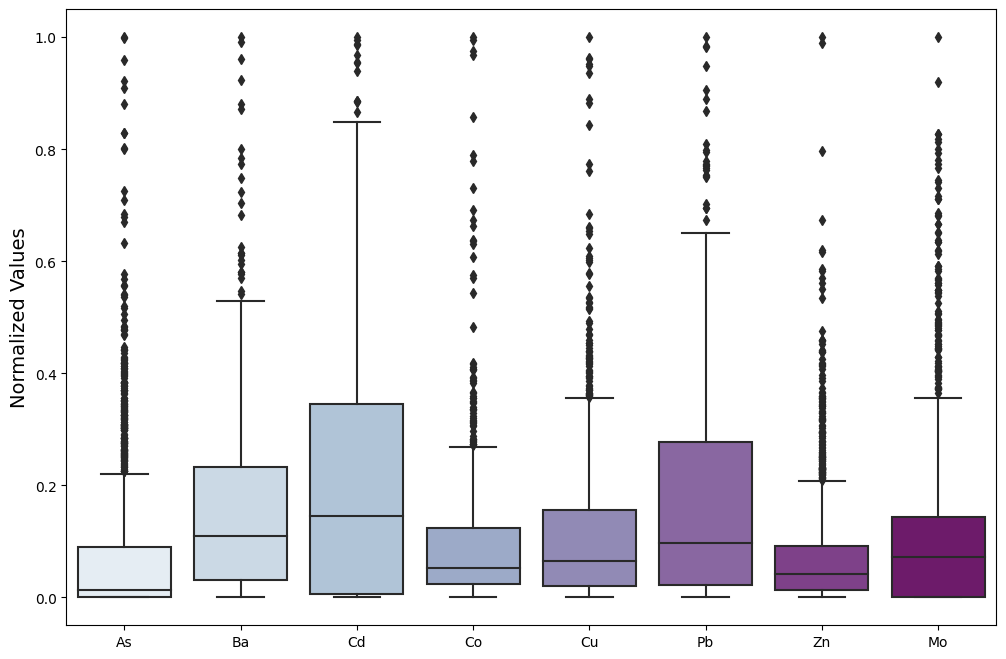

In [4]:
data_plot = data.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
data_plot[columns_to_plot] = scaler.fit_transform(data_plot[columns_to_plot])

ax = sns.boxplot(data=data_plot[columns_to_plot], orient='v', palette='BuPu')
ax.figure.set_size_inches(12, 8)
#ax.set_title(' ', fontsize=18)
ax.set_ylabel('Normalized Values', fontsize=14)


plt.savefig('full_boxplot.png', 
           dpi=300, bbox_inches='tight')

plt.show()

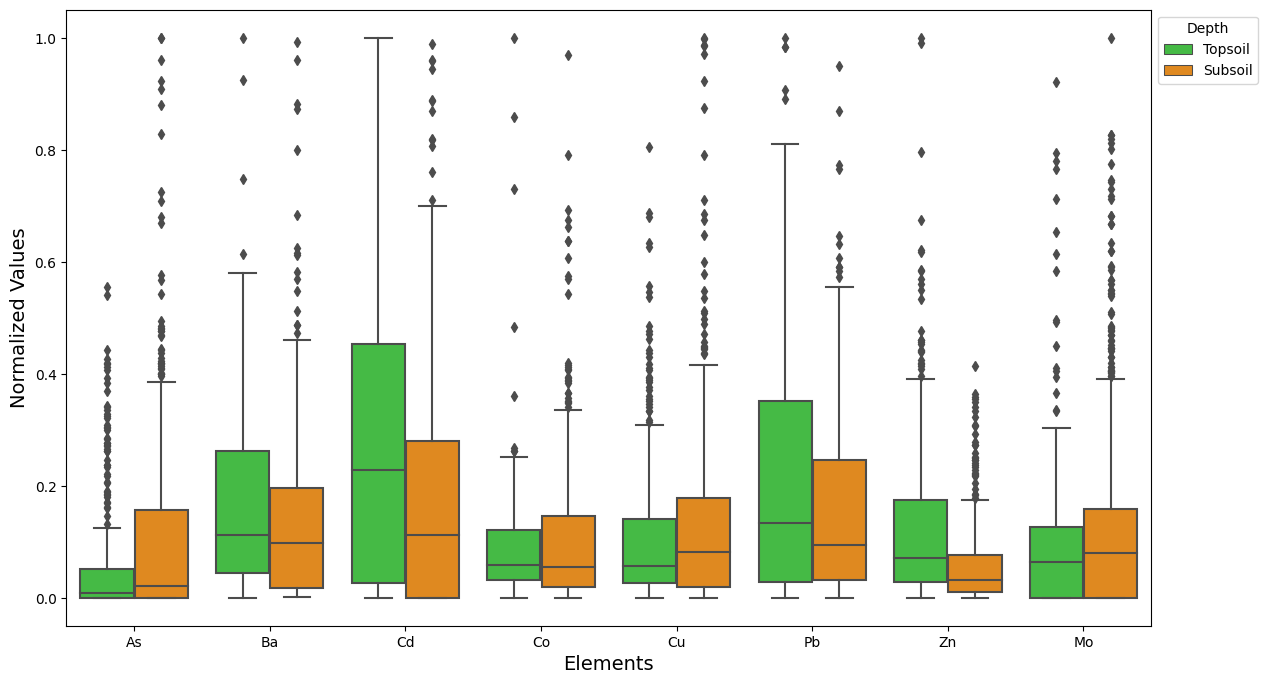

In [5]:
#data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')
subsoil = pd.read_csv('subsoil.csv', header=None)
topsoil = pd.read_csv('topsoil.csv', header=None)

data['depth'] = 'None'
data.loc[data['id.layer_uuid_c'].isin(subsoil[0]), 'depth'] = 'Subsoil'
data.loc[data['id.layer_uuid_c'].isin(topsoil[0]), 'depth'] = 'Topsoil'
data_depth = data[data['depth'] != 'None']

#for col in columns_to_plot:
#    data = data.sort_values(by=col,ascending=False)
#    data = data[5:]

data_plot = data_depth.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
data_plot[columns_to_plot] = scaler.fit_transform(data_plot[columns_to_plot])

data_melted = pd.melt(data_plot, id_vars=['depth'], value_vars=columns_to_plot, var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data_melted, 
                x='Variable', 
                y='Value', 
                hue='depth', 
                orient='v', 
                palette = ["limegreen", "darkorange"],
                hue_order=['Topsoil','Subsoil'])
#ax.set_title(' ', fontsize=18)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.set_xlabel('Elements', fontsize=14)
plt.legend(title='Depth', loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('depth_boxplot.png', 
           dpi=300, bbox_inches='tight')

plt.show()

In [6]:
data_plot['depth'] = 'All samples'
data_depth[columns_to_plot] = scaler.fit_transform(data_depth[columns_to_plot])

data_melted = pd.concat([pd.melt(data_plot, id_vars=['depth'], value_vars=columns_to_plot, var_name='Variable', value_name='Value'), 
                         pd.melt(data_depth, id_vars=['depth'], value_vars=columns_to_plot, var_name='Variable', value_name='Value')], 
                        axis=0)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_9172\2509881144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depth[columns_to_plot] = scaler.fit_transform(data_depth[columns_to_plot])


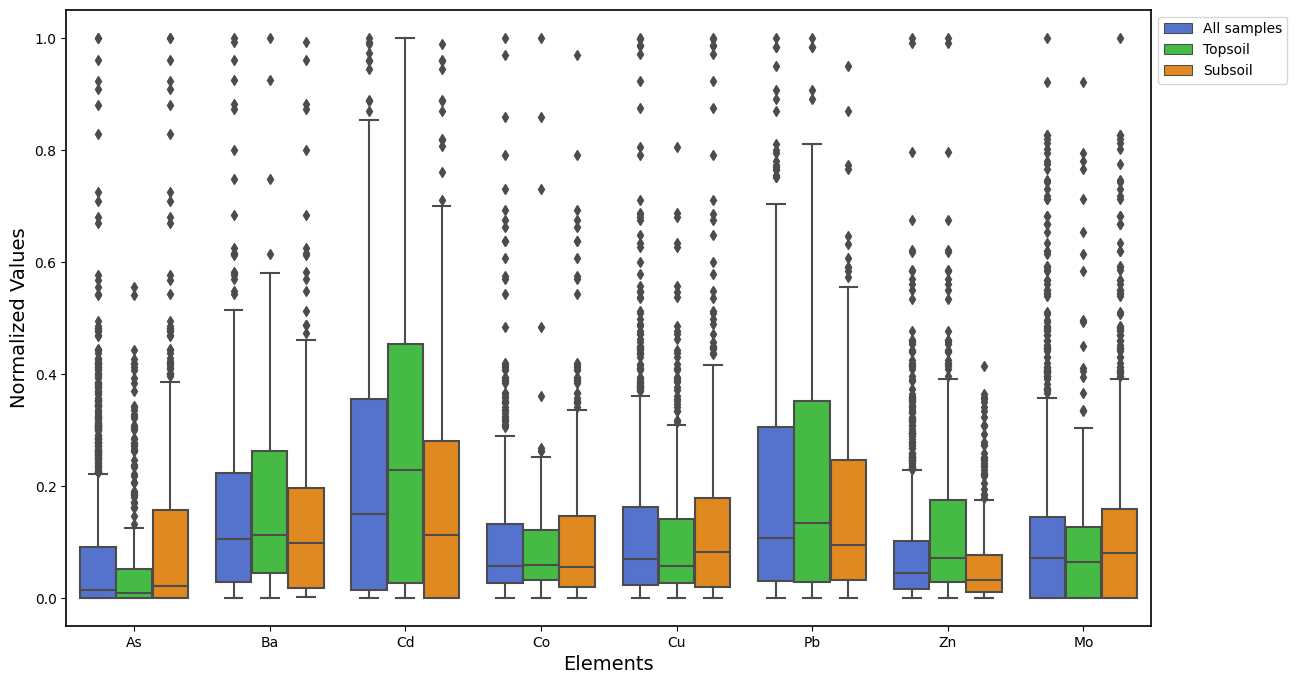

In [28]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data_melted, 
                x='Variable', 
                y='Value', 
                hue='depth', 
                orient='v', 
                palette = ["royalblue","limegreen", "darkorange"],
                hue_order=['All samples','Topsoil','Subsoil'])
#ax.set_title(' ', fontsize=18)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.set_xlabel('Elements', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('merged_boxplot.png', 
           dpi=300, bbox_inches='tight')

plt.show()

In [9]:
descriptive = pd.DataFrame(data[columns_to_plot].describe())
columns = descriptive.index.tolist()
descriptive = descriptive.T.reset_index()
descriptive.columns = ['Elements'] + columns
descriptive.drop(columns=['count','25%','75%'], inplace=True)
descriptive.columns = ['Elements', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
descriptive = descriptive[['Elements', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
#descriptive.to_csv('descriptive_analysis.csv', index=False)
descriptive

,Elements,Minimum,Median,Mean,Maximum,Standard Deviation
0,As,0.0,0.115432,0.773333,9.158415,1.375423
1,Ba,0.0,51.848142,71.615234,473.588566,70.320472
2,Cd,0.0,0.111462,0.166621,0.768254,0.176281
3,Co,0.0,0.471431,0.836624,8.928518,1.041805
4,Cu,0.0,1.170554,2.085895,18.085914,2.594011
5,Pb,0.0,0.771729,1.342446,8.011357,1.468183
6,Zn,0.0,0.767829,1.487047,18.822067,2.052122
7,Mo,0.0,0.082041,0.133634,1.144700,0.178534


In [10]:
descriptive = pd.DataFrame(data.loc[data['id.layer_uuid_c'].isin(topsoil[0])][columns_to_plot].describe())
columns = descriptive.index.tolist()
descriptive = descriptive.T.reset_index()
descriptive.columns = ['Elements'] + columns
descriptive.drop(columns=['count','25%','75%'], inplace=True)
descriptive.columns = ['Elements', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
descriptive_topsoil = descriptive[['Elements', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
#descriptive_topsoil.to_csv('descriptive_topsoil_analysis.csv', index=False)
descriptive_topsoil

,Elements,Minimum,Median,Mean,Maximum,Standard Deviation
0,As,0.0,0.083478,0.469002,5.087278,0.878065
1,Ba,0.0,53.113787,77.841997,473.588566,69.552608
2,Cd,0.0,0.174748,0.203745,0.765177,0.193703
3,Co,0.0,0.523494,0.779009,8.928518,0.846410
4,Cu,0.0,0.994895,1.911203,14.004649,2.234283
5,Pb,0.0,1.067102,1.699720,8.011357,1.735005
6,Zn,0.0,1.350035,2.345050,18.822067,2.732165
7,Mo,0.0,0.072384,0.105013,1.053641,0.140665


In [11]:
descriptive = pd.DataFrame(data.loc[data['id.layer_uuid_c'].isin(subsoil[0])][columns_to_plot].describe())
columns = descriptive.index.tolist()
descriptive = descriptive.T.reset_index()
descriptive.columns = ['Elements'] + columns
descriptive.drop(columns=['count','25%','75%'], inplace=True)
descriptive.columns = ['Elements', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
descriptive_subsoil = descriptive[['Elements', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
#descriptive_subsoil.to_csv('descriptive_subsoil_analysis.csv', index=False)
descriptive_subsoil

,Elements,Minimum,Median,Mean,Maximum,Standard Deviation
0,As,0.000000,0.198329,1.004307,9.158415,1.595159
1,Ba,0.205835,45.918674,62.064810,469.782287,68.961643
2,Cd,0.000000,0.086071,0.142880,0.757204,0.159873
3,Co,0.000000,0.495238,0.934470,8.652933,1.145474
4,Cu,0.000000,1.433352,2.234463,17.417970,2.817673
5,Pb,0.000000,0.758909,1.217953,7.607236,1.279674
6,Zn,0.000000,0.587511,1.016337,7.781080,1.281435
7,Mo,0.000000,0.090970,0.156914,1.144700,0.206164


In [12]:
spectra = data[['id.layer_uuid_c'] + list(data.columns[10:-1])]
wavelenghts = list(range(600,4002,2))
spectra.columns = ['id'] + wavelenghts

In [13]:
data.depth.value_counts()

Subsoil    514
Topsoil    429
None       222
Name: depth, dtype: int64

In [14]:
total_spectra = spectra[1:].mean(numeric_only=True)
topsoil_spectra = data[data['depth'] == 'Topsoil']
topsoil_spectra = topsoil_spectra[['id.layer_uuid_c'] + list(topsoil_spectra.columns[10:-1])]
topsoil_spectra.columns = ['id'] + wavelenghts
topsoil_spectra = topsoil_spectra[1:].mean(numeric_only=True)
subsoil_spectra = data[data['depth'] == 'Subsoil']
subsoil_spectra = subsoil_spectra[['id.layer_uuid_c'] + list(subsoil_spectra.columns[10:-1])]
subsoil_spectra.columns = ['id'] + wavelenghts
subsoil_spectra = subsoil_spectra[1:].mean(numeric_only=True)

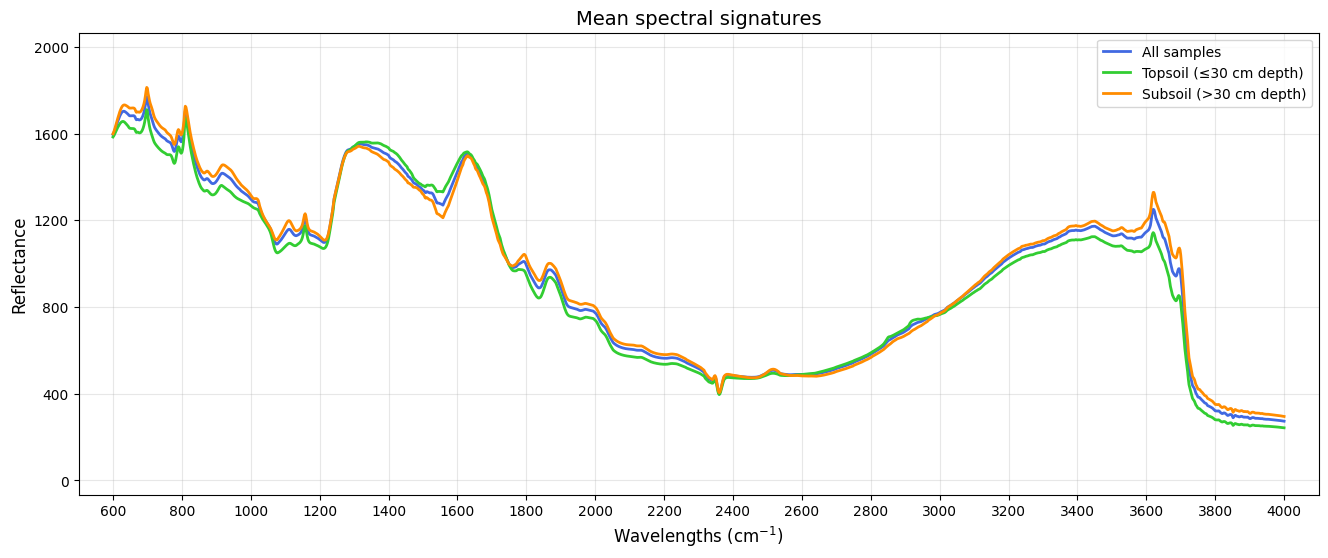

In [15]:
plt.figure(figsize=(16,6))

plt.plot(total_spectra, label='All samples', linewidth=2, color='royalblue')
plt.plot(topsoil_spectra, label='Topsoil (≤30 cm depth)', linewidth=2, color='limegreen')
plt.plot(subsoil_spectra, label='Subsoil (>30 cm depth)', linewidth=2, color='darkorange')

plt.xlabel('Wavelengths (cm$^{-1}$)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('Mean spectral signatures', fontsize=14)
plt.xlim(500,4100)
plt.ylim(-66,2066)

plt.legend()

plt.rcParams['axes.linewidth'] = 1.2
x_ticks = range(600, 4199, 200)
y_ticks = range(0, 2001, 400)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(True, linestyle='-', alpha=0.3)

plt.savefig('mean_spectra.png', 
           dpi=300, bbox_inches='tight')

plt.show()

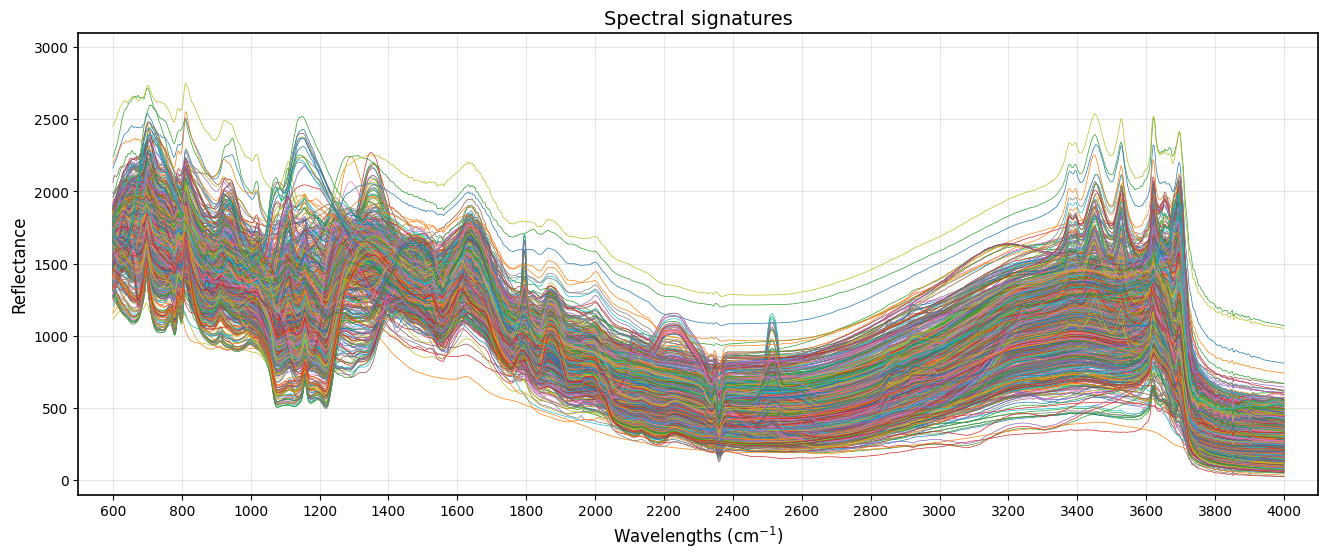

In [16]:
plt.figure(figsize=(16,6))

for index, row in spectra.iloc[:,1:].astype(float).iterrows():
    plt.plot(row, linewidth=0.5)

plt.xlabel('Wavelengths (cm$^{-1}$)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('Spectral signatures', fontsize=14)
plt.xlim(500,4100)
plt.ylim(-100,3100)

plt.rcParams['axes.linewidth'] = 1.2
x_ticks = range(600, 4199, 200)
y_ticks = range(0, 3001, 500)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(True, linestyle='-', alpha=0.3)

plt.savefig('all_spectra.png', 
           dpi=300, bbox_inches='tight')

plt.show()

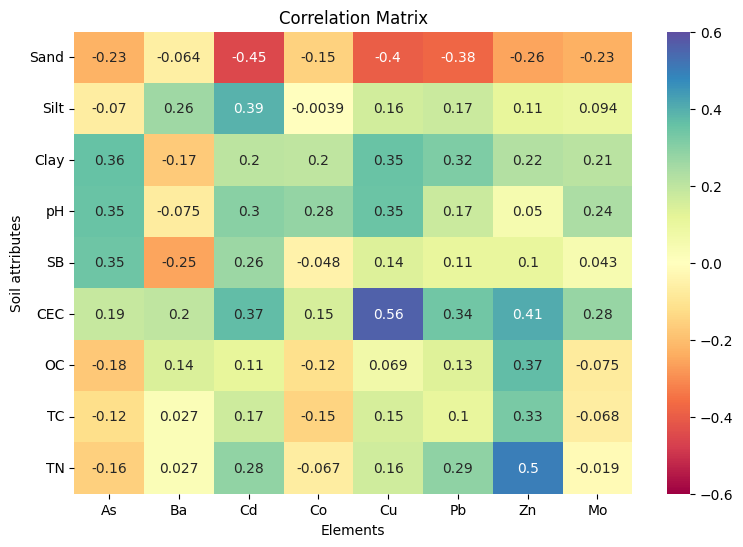

In [17]:
correlation = filter_data.dropna().corr(numeric_only=True).iloc[:14,14:]

correlation.columns = ['As', 'Ba', 'Cd', 'Co', 'Cr', 'Cu', 'Pb', 'Zn', 'Mo']
correlation.drop(columns=['Cr'], inplace=True)
correlation.index = ['TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH','pH (CaCl$_2$)','K','Na','S']
correlation.drop(index=['Mg','K','Na','S','pH (CaCl$_2$)'], inplace=True)
correlation = correlation.reindex(['Sand','Silt','Clay','pH','SB','CEC','OC','TC','TN'])

plt.figure(figsize=(9,6))

sns.heatmap(correlation, vmin=-0.6, vmax=0.6, annot=True, cmap='Spectral')

plt.yticks(rotation=0) 
plt.title('Correlation Matrix')
plt.xlabel('Elements', fontsize=10)
plt.ylabel('Soil attributes', fontsize=10)

plt.savefig('pearson_corr_matrix.png', 
           dpi=300, bbox_inches='tight')

plt.show()

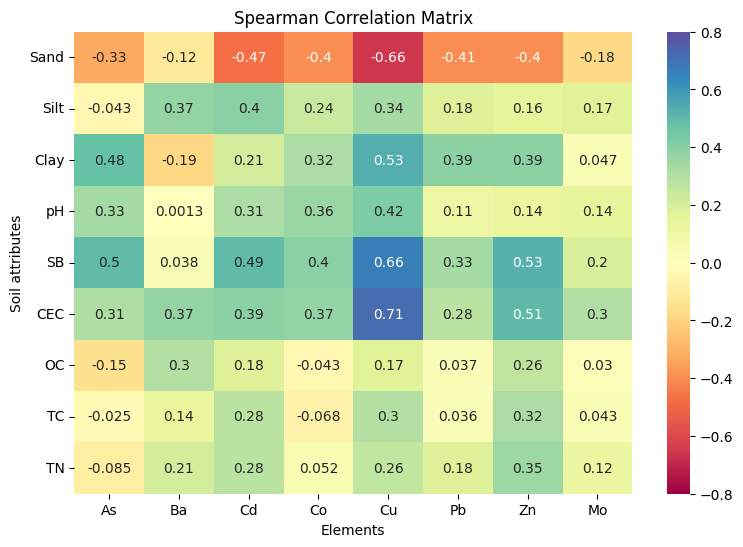

In [18]:
correlation = filter_data.dropna().corr(method='spearman', numeric_only=True).iloc[:14,14:]

correlation.columns = ['As', 'Ba', 'Cd', 'Co', 'Cr', 'Cu', 'Pb', 'Zn', 'Mo']
correlation.drop(columns=['Cr'], inplace=True)
correlation.index = ['TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH','pH (CaCl$_2$)','K','Na','S']
correlation.drop(index=['Mg','K','Na','S','pH (CaCl$_2$)'], inplace=True)
correlation = correlation.reindex(['Sand','Silt','Clay','pH','SB','CEC','OC','TC','TN'])

plt.figure(figsize=(9,6))

sns.heatmap(correlation, vmin=-0.8, vmax=0.8, annot=True, cmap='Spectral')

plt.yticks(rotation=0) 
plt.title('Spearman Correlation Matrix')
plt.xlabel('Elements', fontsize=10)
plt.ylabel('Soil attributes', fontsize=10)

plt.savefig('spearman_corr_matrix.png', 
           dpi=300, bbox_inches='tight')

plt.show()

In [19]:
attributes = filter_data.dropna().iloc[:,1:15]
attributes.columns = [#'id.layer_uuid_c',
    'TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']

attributes = attributes[['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN']].describe()
columns = attributes.index.tolist()
attributes = attributes.T.reset_index()
attributes.columns = ['Attributes'] + columns
attributes.drop(columns=['count','25%','75%'], inplace=True)
attributes.columns = ['Attributes', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
soil_attributes = attributes[['Attributes', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
#soil_attributes.to_csv('soil_attributes.csv')
#soil_attributes

In [20]:
attributes = filter_data.loc[filter_data['id.layer_uuid_c'].isin(topsoil[0])].dropna().iloc[:,1:15]
attributes.columns = [#'id.layer_uuid_c',
    'TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']

attributes = attributes[['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN']].describe()
columns = attributes.index.tolist()
attributes = attributes.T.reset_index()
attributes.columns = ['Attributes'] + columns
attributes.drop(columns=['count','25%','75%'], inplace=True)
attributes.columns = ['Attributes', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
topsoil_attributes = attributes[['Attributes', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
#topsoil_attributes.to_csv('topsoil_attributes.csv')
#topsoil_attributes

In [21]:
attributes = filter_data.loc[filter_data['id.layer_uuid_c'].isin(subsoil[0])].dropna().iloc[:,1:15]
attributes.columns = [#'id.layer_uuid_c',
    'TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']

attributes = attributes[['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN']].describe()
columns = attributes.index.tolist()
attributes = attributes.T.reset_index()
attributes.columns = ['Attributes'] + columns
attributes.drop(columns=['count','25%','75%'], inplace=True)
attributes.columns = ['Attributes', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
subsoil_attributes = attributes[['Attributes', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
#subsoil_attributes.to_csv('subsoil_attributes.csv')
#subsoil_attributes

In [22]:
all_attributes = pd.concat([soil_attributes, 
                            topsoil_attributes.drop(columns=['Attributes']), 
                            subsoil_attributes.drop(columns=['Attributes'])], 
                           axis=1)
all_attributes.columns = (['Attributes','Min','Median','Mean','Max','SD',
                                       'Min','Median','Mean','Max','SD',
                                       'Min','Median','Mean','Max','SD'])

#all_attributes.to_csv('all_attributes.csv', index=False)

#all_attributes.round(2)

In [23]:
data['depth'].value_counts()

Subsoil    514
Topsoil    429
None       222
Name: depth, dtype: int64

In [24]:
#data.pop('depth')

In [25]:
data.iloc[1:2,10:]

,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,scan_mir.618_abs,...,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs,depth
178,1798,1812,1826,1839,1851,1862,1871,1879,1886,1894,...,414,414,413,412,411,411,411,410,410,Topsoil


In [26]:
resampled_data = pd.DataFrame()

# Resample the columns in groups of 100 and compute the mean
for i in range(10, 1710, 100):
    subset = data.iloc[:, i:i+100]  # Select the next 100 columns
    mean_values = subset.mean(axis=1)  # Compute the mean along columns (axis=1)
    resampled_data[f'Mean_{i//100}'] = mean_values

resampled_data = pd.concat([data.iloc[:,1:10], resampled_data], axis=1)

resampled_data

,As,Ba,Cd,Co,Cr,Cu,Pb,Zn,Mo,Mean_0,...,Mean_7,Mean_8,Mean_9,Mean_10,Mean_11,Mean_12,Mean_13,Mean_14,Mean_15,Mean_16
679,0.443443,1.784083,0.412505,1.000324,0.257815,4.558177,1.330328,2.021273,1.144700,1467.55,...,491.49,378.57,404.38,328.14,491.50,687.89,891.56,897.31,553.09,139.58
178,5.087278,82.843874,0.063857,0.542785,0.021286,2.894853,1.011070,5.917420,1.053641,1843.43,...,797.04,649.41,660.16,744.48,955.38,1171.60,1401.85,1427.33,973.36,422.31
434,2.486847,43.129622,0.322562,2.892650,0.093647,1.550377,1.706455,1.498351,0.946875,1670.32,...,687.84,536.84,440.04,462.49,653.49,1012.41,1333.11,1370.18,888.06,336.28
678,0.390879,1.625234,0.349734,0.617177,0.267444,3.661920,0.997770,1.110919,0.946339,1563.06,...,553.34,438.36,445.31,369.23,537.80,747.52,970.06,986.38,636.41,198.09
485,4.366893,92.858282,0.494365,3.100082,0.123591,2.234943,2.770506,1.627286,0.937234,1571.60,...,576.59,416.92,338.14,356.96,537.41,875.22,1169.93,1196.80,768.19,230.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,7.331161,23.792283,0.083665,0.219621,0.271912,7.121998,0.000000,3.974096,0.000000,1801.77,...,670.81,543.01,578.25,540.10,746.50,1010.24,1290.77,1345.39,857.01,366.13
766,0.102129,50.778405,0.510644,0.663837,0.061277,1.133629,1.113203,3.931956,0.000000,1496.80,...,532.57,420.94,426.16,483.58,628.66,799.93,943.47,928.86,602.68,192.31
146,6.494336,16.345648,0.000000,0.690219,0.439231,5.239392,0.115036,3.858953,0.000000,1862.52,...,721.78,583.45,633.93,578.78,787.34,1055.60,1323.20,1371.78,909.26,391.81
311,1.025947,50.332348,0.071105,1.625263,0.111737,1.757315,0.802473,0.426631,0.000000,1544.98,...,596.28,463.85,431.02,464.77,586.24,784.47,977.29,1000.33,773.66,335.88


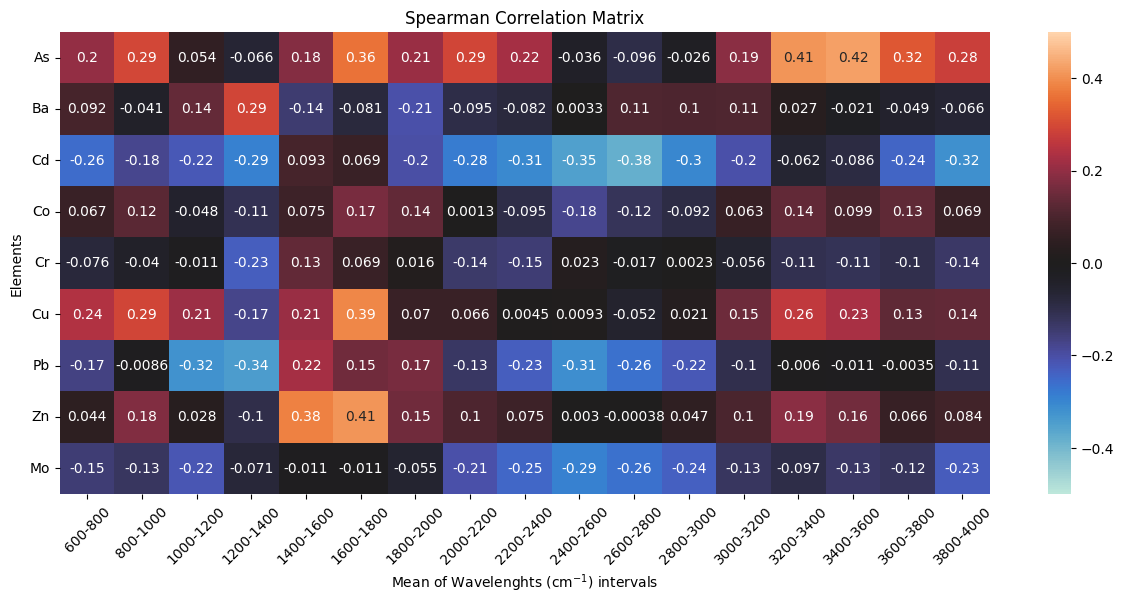

In [27]:
correlation = resampled_data.corr(method='spearman', numeric_only=True).iloc[:9,9:]

correlation.columns = ['600-800',
                       '800-1000',
                       '1000-1200',
                       '1200-1400',
                       '1400-1600',
                       '1600-1800',
                       '1800-2000',
                       '2000-2200',
                       '2200-2400',
                       '2400-2600',
                       '2600-2800',
                       '2800-3000',
                       '3000-3200',
                       '3200-3400',
                       '3400-3600',
                       '3600-3800',
                       '3800-4000']
#correlation.drop(columns=['Cr'], inplace=True)
#correlation.index = ['TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH','pH (CaCl$_2$)','K','Na','S']
#correlation.drop(index=['Mg','K','Na','S','pH (CaCl$_2$)'], inplace=True)
#correlation = correlation.reindex(['Sand','Silt','Clay','pH','SB','CEC','OC','TC','TN'])

plt.figure(figsize=(15,6))

sns.heatmap(correlation, vmin=-0.5, vmax=0.5, annot=True, cmap='icefire')

plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.title('Spearman Correlation Matrix')
plt.xlabel('Mean of Wavelenghts (cm$^{-1}$) intervals', fontsize=10)
plt.ylabel('Elements', fontsize=10)

plt.savefig('spearman_corr_matrix_Element_WL.png', 
           dpi=300, bbox_inches='tight')

plt.show()